<a href="https://colab.research.google.com/github/bits-mtech/DL/blob/main/Assignment-2/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle 
import re

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

In [31]:
# Read the data from the file

with open('/content/drive/MyDrive/Colab_Notebooks/set_1.pkl', 'rb') as fid:
     data3 = pickle.load(fid)

In [32]:
def check_find_punctuations(text):
    
    # regular expression containing
    # all punctuation
    result = re.findall(r'[#\t]*', 
                        text)
      
    # form a string
    string = "".join(result)
      
    # list of strings return
    return list(string)

In [33]:
image_list = []
comment_list = []
comment_id_list = []
for line in data3:
  a = re.split('[?#\t]', line)
  image_list.append(a[0])
  comment_id_list.append(a[1])
  comment_list.append(a[2])
# intialise data of lists.
data = {'Image':image_list, 'comment_id':comment_id_list, 'comment': comment_list}
 
# Create DataFrame
df = pd.DataFrame(data)
df.sort_values(by=['Image','comment_id'],inplace=True)
df.reset_index()
df.head(10)

,Image,comment_id,comment
10060,1000268201_693b08cb0e.jpg,0,A child in a pink dress be climb up a set of s...
9037,1000268201_693b08cb0e.jpg,1,A girl go into a wooden building .
17952,1000268201_693b08cb0e.jpg,2,A little girl climb into a wooden playhouse .
20907,1000268201_693b08cb0e.jpg,3,A little girl climb the stair to her playhouse .
22408,1000268201_693b08cb0e.jpg,4,A little girl in a pink dress go into a wooden...
3144,1001773457_577c3a7d70.jpg,1,A black dog and a tri-colored dog play with ea...
22138,1001773457_577c3a7d70.jpg,2,A black dog and a white dog with brown spot be...
23829,1001773457_577c3a7d70.jpg,4,Two dog on pavement move toward each other .
22788,1002674143_1b742ab4b8.jpg,1,A little girl be sit in front of a large paint...
17907,1002674143_1b742ab4b8.jpg,3,There be a girl with pigtail sit in front of a...


In [34]:
df['Image'][0]

'2089122314_40d5739aef.jpg'

In [35]:
#!unzip /content/drive/MyDrive/Colab_Notebooks/Image_captioning_Dataset.zip -d /content/drive/MyDrive/Colab_Notebooks/Image

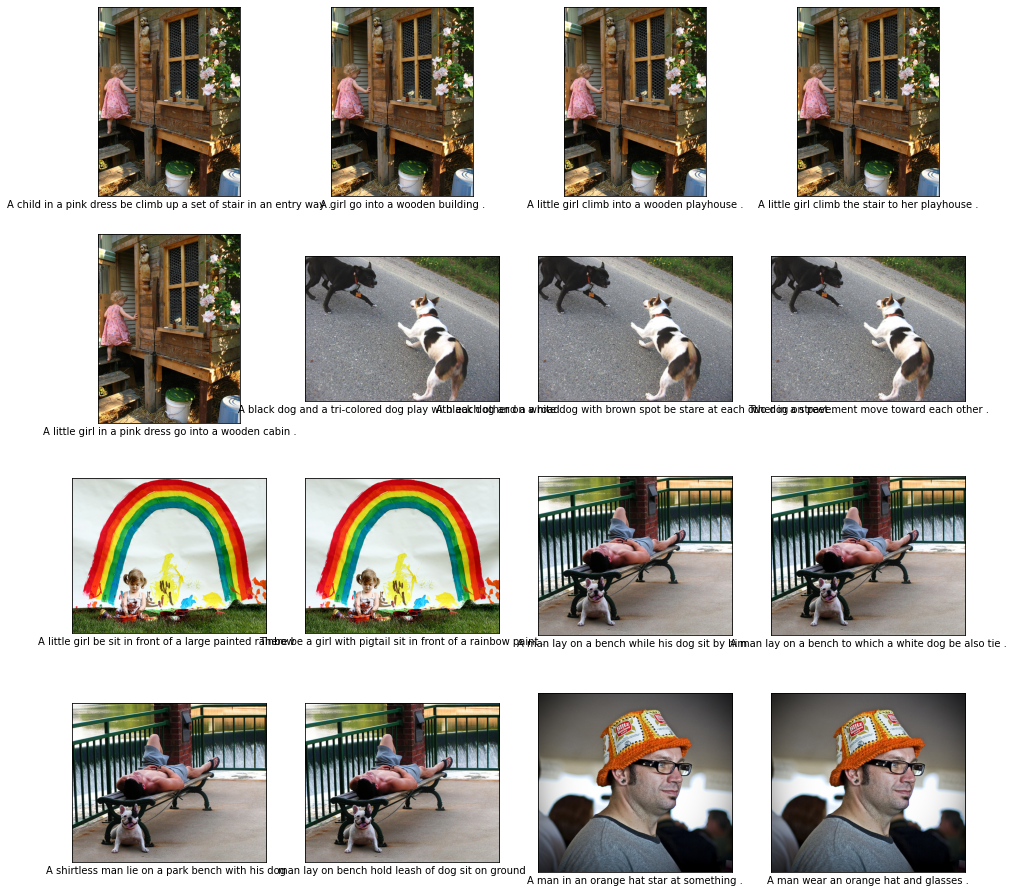

In [47]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = plt.imread('/content/drive/MyDrive/Colab_Notebooks/Image/Flicker8k_Dataset/{}'.format(str(df["Image"].iloc[i])))
    plt.imshow(img)
    plt.xlabel(df["comment"].iloc[i])
plt.show()